In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

%cd ../
!hostname

/p/project1/cjinm11/Private/oberstrass1/git/pli/features/cl-3d
jrlogin09.jureca


In [23]:
# Load benchmark data

scaling_csv = "doc/node_scaling.csv"

batch_size = 128
epoch_size = 4194304

gpus_per_node = 4
cpus_per_node = 128

###

import pandas as pd

# Load values storing execution time of run_training_epoch function
df = pd.read_csv(scaling_csv)


df['cores'] = df['nodes'] * cpus_per_node
df['gpus'] = df['nodes'] * gpus_per_node
df['samples_per_s'] = epoch_size / df['runtime']

reference_sps = df.loc[0]['samples_per_s']
def compute_speedup(row):
    return row['samples_per_s'] / reference_sps

# Apply the function to each row in the DataFrame and create a new column
df['speedup'] = df.apply(lambda row: compute_speedup(row), axis=1)

ref_gpus = df.loc[0]['gpus']
def compute_efficiency(row):
    return ref_gpus * row['speedup'] / row['gpus']

df['efficiency'] = df.apply(lambda row: compute_efficiency(row), axis=1)

df.head()

,nodes,runtime,cores,gpus,samples_per_s,speedup,efficiency
0,1,1746.9,128,4,2400.998340,1.000000,1.000000
1,2,1094.5,256,8,3832.164459,1.596071,0.798036


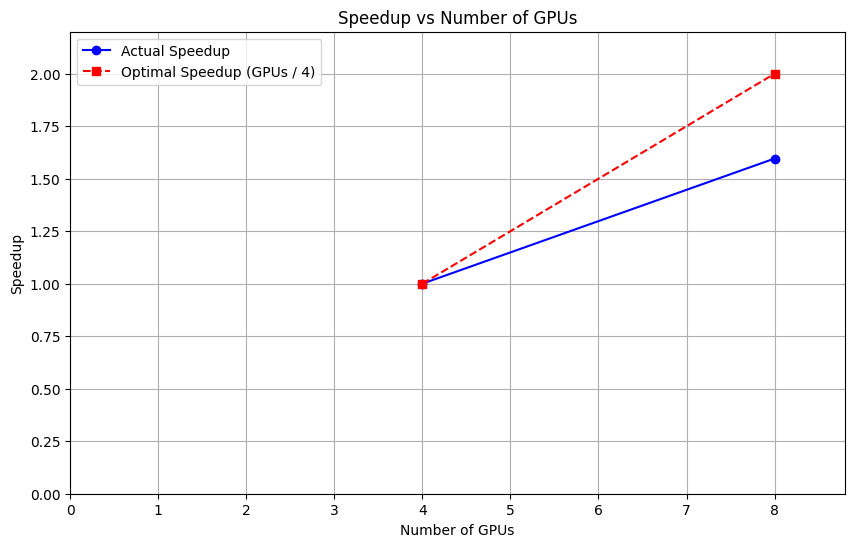

In [24]:
# Plot it

import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Plot number of GPUs against speedup
plt.plot(df['gpus'], df['speedup'], 'o-', label='Actual Speedup', color='blue')

# Plot reference line for optimal speedup
optimal_speedup = df['gpus'] / 4
plt.plot(df['gpus'], optimal_speedup, 's--', label='Optimal Speedup (GPUs / 4)', color='red')

# Adding labels and title
plt.xlabel('Number of GPUs')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of GPUs')
plt.legend()

# Set x-axis limits
plt.xlim(0, 1.1 * df['gpus'].max())

# Set x-axis limits
plt.ylim(0, 1.1 * optimal_speedup.max())

# Display the plot
plt.grid(True)
plt.show()